# basic dataset info

* Source: emdat
* Region == Asia
* Disaster Group == Natural

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
sns.set_theme(style="darkgrid")
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 1000)

In [139]:
d = pd.read_csv("../raw/emdat_public_2021_08_08_query_uid-lkltYs.csv")[5:].reset_index(drop=True)
d.columns = d.iloc[0]
df = d[1:].reset_index(drop=True)
df

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,2000-0372-CHN,2000,0372,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,China,CHN,Eastern Asia,Asia,"Quanzhou, Zhangzhou, Xiamen districts (Fujian ...",Monsoonal rain,Rain,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,76000,Km2,NaN,NaN,NaN,NaN,2000,6,17,2000,6,30,43,10,NaN,31000,31010,NaN,NaN,19000,67.35575898,1;2,914,13006;13009;13010,"Jiangxi Sheng (Adm1). Quanzhou, Xiamen, Zhangz..."
1,2000-9186-AFG,2000,9186,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Afghanistan,AFG,Southern Asia,Asia,"Kandahar, Hilmand, Nimroz, Zabul, Uruzgan prov...",NaN,Water shortage,Famine,NaN,Yes,NaN,715539,NaN,Km2,NaN,NaN,NaN,NaN,2000,5,NaN,2002,NaN,NaN,37,NaN,2580000,NaN,2580000,NaN,NaN,50,67.35575898,1,272;273;274;277;279;281;282;285;287;289;293;29...,NaN,"Badakhshan, Badghis, Baghlan, Farah, Ghazni, H..."
2,2000-0373-BGD,2000,0373,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,"Bakalia, Kotwali, Chandgaon, Pahartali, Hathaz...",Monsoonal rain,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,NaN,17000,Km2,NaN,NaN,NaN,"Bramputra, Darata",2000,6,24,2000,6,24,11,50,200000,NaN,200050,NaN,NaN,NaN,67.35575898,2,NaN,5770;5772,"Chittagong, Cox's Bazar (Adm2)."
3,2000-0484-BTN,2000,0484,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Bhutan,BTN,Southern Asia,Asia,"Pasakha area (Sampheling district, Chhukha pro...",Monsoonal rain,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,50,NaN,Km2,NaN,NaN,NaN,"Brahmaputra, Varsha",2000,8,2,2000,8,30,200,NaN,NaN,1000,1000,NaN,NaN,NaN,67.35575898,2,NaN,5943;5953,"Phuentshogling, Sampheling (Adm2)."
4,2000-0677-CHN,2000,0677,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,China,CHN,Eastern Asia,Asia,"Xuwen area (Zhanjiang district, Guandong provi...",Tropical cyclone,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,NaN,11170,Km2,NaN,NaN,NaN,NaN,2000,10,12,2000,10,18,10,NaN,200000,NaN,200000,NaN,NaN,25366,67.35575898,1;2,906,13035,Hainan Sheng (Adm1). Zhanjiang (Adm2).
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489,2020-0216-YEM,2020,0216,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Yemen,YEM,Western Asia,Asia,"Hadhramaut, Shabwa, Al Mahrah","Heavy rains, cyclone Nisarga",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,2020,6,3,2020,6,4,16,85,130,NaN,215,NaN,NaN,NaN,NaN,1,3413;3424;144970,NaN,"Al Maharah, Hadramaut, Shabwah (Adm1)."
3490,2020-0314-YEM,2020,0314,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Yemen,YEM,Western Asia,Asia,"Marib, Dhale, Abyan, Hadhramaut, Ibb, Hodeidah...",Heavy rains,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,2020,8,1,2020,8,5,20,6,9000,NaN,9006,NaN,NaN,NaN,NaN,1,3407;3408;3411;3418;3419;3421;144970,NaN,"Abyan, Al Dhale'e, Al Hudaydah, Hadramaut, Haj..."
3491,2020-0319-YEM,2020,0319,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Yemen,YEM,Western Asia,Asia,"Lahij, Ibb, Shabwah, Abyan and Sana'a governor...",Heavy rains,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,2020,7,22,2020,7,25,17,NaN,NaN,150,150,NaN,NaN,NaN,NaN,1,3407;3419;3420;3424;144972,NaN,"Abyan, Ibb, Lahj, Sana'a, Shabwah (Adm1)."
3492,2021-0449-YEM,2021,0449,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Yemen,YEM,Western Asia,Asia,"Marib,Taizz, al-Mahrah, Hadramawt, Shabwa, Aby...",Heavy rains,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,2021,7,16,2021,7,28,1

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3494 entries, 0 to 3493
Data columns (total 47 columns):
Dis No                             3494 non-null object
Year                               3494 non-null object
Seq                                3494 non-null object
Glide                              524 non-null object
Disaster Group                     3494 non-null object
Disaster Subgroup                  3494 non-null object
Disaster Type                      3494 non-null object
Disaster Subtype                   2993 non-null object
Disaster Subsubtype                231 non-null object
Event Name                         786 non-null object
Country                            3494 non-null object
ISO                                3494 non-null object
Region                             3494 non-null object
Continent                          3494 non-null object
Location                           3425 non-null object
Origin                             1345 non-null object


# overview

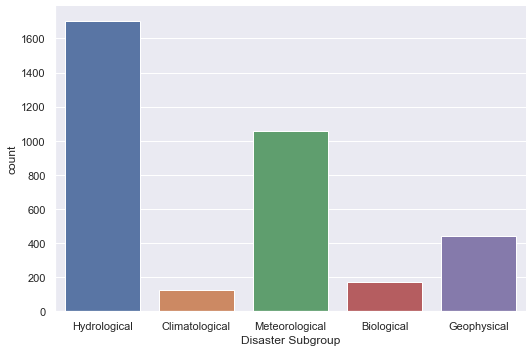

In [141]:
ax = sns.catplot(x="Disaster Subgroup", kind="count", data=df, height=5, aspect=1.5)

In [142]:
df["Disaster Subtype"] = df["Disaster Subtype"].apply(lambda x: x if not pd.isnull(x) else "None")
df.groupby(["Disaster Subgroup", "Disaster Type", "Disaster Subtype"])["Dis No"].count()

Disaster Subgroup  Disaster Type          Disaster Subtype                
Biological         Epidemic               Bacterial disease                    36
                                          None                                 27
                                          Parasitic disease                     5
                                          Viral disease                       101
                   Insect infestation     Locust                                3
Climatological     Drought                Drought                              86
                                          None                                  1
                   Glacial lake outburst  None                                  2
                   Wildfire               Forest fire                          27
                                          Land fire (Brush, Bush, Pasture)      3
                                          None                                  4
Geophysical        Eart

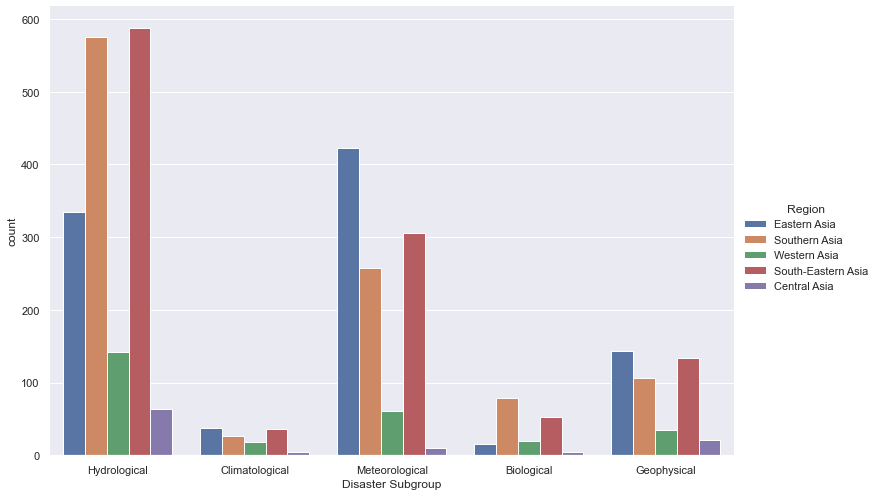

In [143]:
ax = sns.catplot(x="Disaster Subgroup", kind="count", hue="Region", data=df, height=7, aspect=1.5)

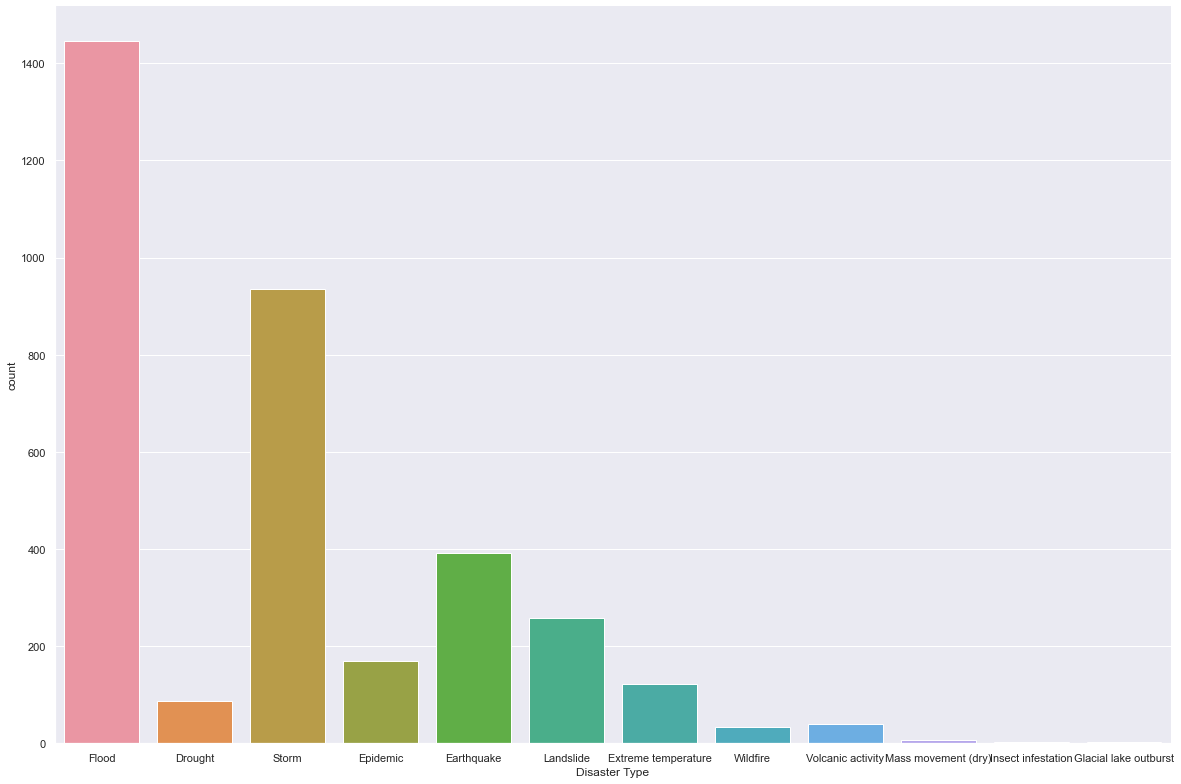

In [147]:
ax = sns.catplot(x="Disaster Type", kind="count", data=df, height=11, aspect=1.5)

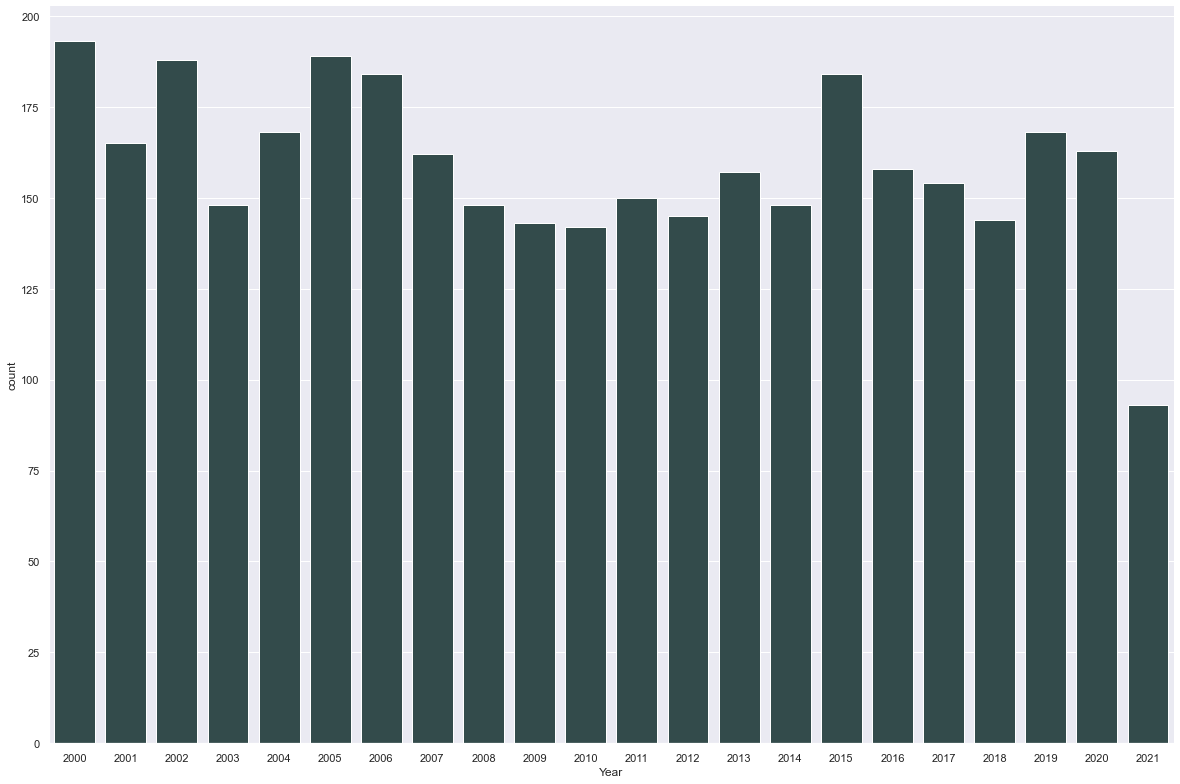

In [148]:
ax = sns.catplot(x="Year", kind="count", data=df, height=11, aspect=1.5, color="darkslategray")

In [149]:
df["Country"].value_counts()

China                                          604
India                                          367
Philippines (the)                              334
Indonesia                                      333
Viet Nam                                       163
Japan                                          156
Afghanistan                                    151
Bangladesh                                     139
Pakistan                                       138
Iran (Islamic Republic of)                     101
Thailand                                       100
Turkey                                          81
Sri Lanka                                       69
Nepal                                           67
Malaysia                                        64
Taiwan (Province of China)                      63
Korea (the Republic of)                         57
Tajikistan                                      56
Myanmar                                         50
Yemen                          

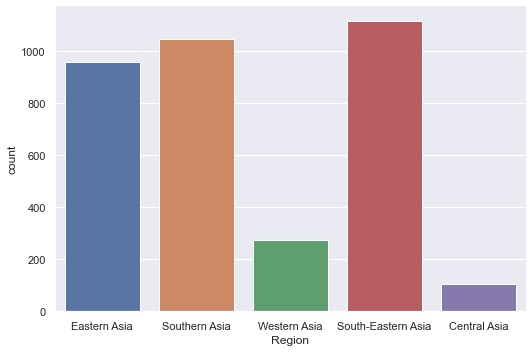

In [150]:
ax = sns.catplot(x="Region", kind="count", data=df, height=5, aspect=1.5)

In [151]:
df.groupby(["Region", "Country"])["Dis No"].count()

Region              Country                                    
Central Asia        Kazakhstan                                      19
                    Kyrgyzstan                                      23
                    Tajikistan                                      56
                    Turkmenistan                                     1
                    Uzbekistan                                       5
Eastern Asia        China                                          604
                    Hong Kong                                       12
                    Japan                                          156
                    Korea (the Democratic People's Republic of)     35
                    Korea (the Republic of)                         57
                    Macao                                            3
                    Mongolia                                        26
                    Taiwan (Province of China)                      63
South-Eastern

# zooming in: disaster type over the years

In [152]:
interest = ["Flood", "Storm", "Earthquake", "Extreme temperature", "Drought", "Landslide"]
data = df[df["Disaster Type"].isin(interest)]
data = pd.DataFrame(data.groupby(["Year", "Disaster Type"], as_index=False)["Dis No"].count())
data

,Year,Disaster Type,Dis No
0,2000,Drought,13
1,2000,Earthquake,20
2,2000,Extreme temperature,8
3,2000,Flood,45
4,2000,Landslide,13
5,2000,Storm,48
6,2001,Drought,5
7,2001,Earthquake,15
8,2001,Extreme temperature,8
9,2001,Flood,62


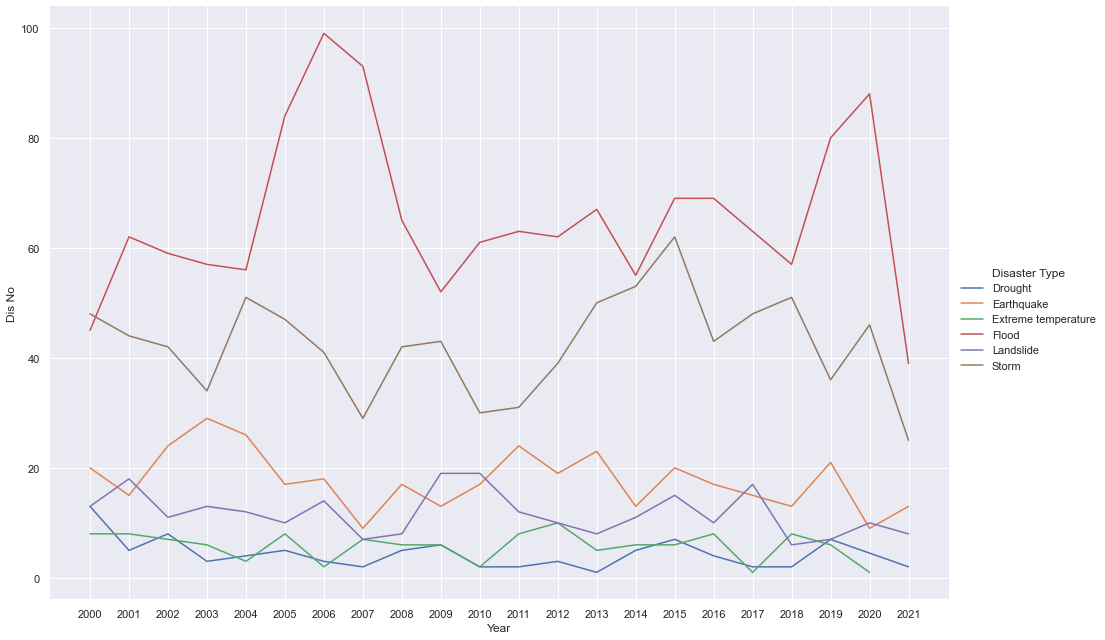

In [158]:
ax = sns.relplot(x="Year", y="Dis No", kind="line", hue="Disaster Type", data=data, height=9, aspect=1.5)

# zooming in: southeast asian region

In [167]:
nointerest = ["Mass movement (dry)", "Extreme temperature", "Epidemic"]
sea = df[df["Region"] == "South-Eastern Asia"]
sea = sea[~sea["Disaster Type"].isin(nointerest)].reset_index(drop=True)
sea

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,2000-0293-IDN,2000,0293,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Indonesia,IDN,South-Eastern Asia,Asia,"Enggano island (Bengkulu Utara district, Bengk...",NaN,"Slide (land, mud, snow, rock)",NaN,Yes,NaN,NaN,5031,7,Richter,-4.646,102.102,23:28,NaN,2000,6,4,2000,6,4,103,2714,200000,2000,204714,NaN,NaN,41000,67.35575898,2,NaN,73654,Bengkulu Utara (Adm2).
1,2000-0791-IDN,2000,0791,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Indonesia,IDN,South-Eastern Asia,Asia,"Taliwan area (Sumbawa Barat district, Nusateng...",Brief torrential rain,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,NaN,590,Km2,NaN,NaN,NaN,NaN,2000,12,3,2000,12,6,38,NaN,39852,NaN,39852,NaN,NaN,NaN,67.35575898,2,NaN,17984;18197;18200;73714;73800;73857;73858,"Bolaangmongondow, Kota Bitung, Kota Manado, Ku..."
2,2000-0230-IDN,2000,0230,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Indonesia,IDN,South-Eastern Asia,Asia,"Totikum, Tinangkung, Liang villages (Banggai K...",NaN,Tsunami/Tidal wave,NaN,NaN,NaN,NaN,215,8,Richter,-1.105,123.573,12:21,NaN,2000,5,4,2000,5,4,45,270,NaN,52500,52770,NaN,NaN,30000,67.35575898,2,NaN,73637;73638,"Banggai, Banggai Kepulauan (Adm2)."
3,2000-0449-IDN,2000,0449,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Indonesia,IDN,South-Eastern Asia,Asia,"Ciranggon village (Karawang district, Jawa Bar...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Richter,-6.675,106.845,NaN,NaN,2000,7,12,2000,7,12,NaN,124,NaN,4000,4124,NaN,NaN,2000,67.35575898,2,NaN,18014,Karawang (Adm2).
4,2000-0761-IDN,2000,0761,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Indonesia,IDN,South-Eastern Asia,Asia,"Pandeglang, Lebak, Serang districts (Banten pr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,Richter,-6.549,105.63,NaN,NaN,2000,10,25,2000,10,25,NaN,NaN,5500,NaN,5500,NaN,NaN,NaN,67.35575898,2,NaN,18020;18022;18024,"Lebak, Pandeglang, Serang (Adm2)."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,2020-0307-VNM,2020,0307,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Sinlaku',Viet Nam,VNM,South-Eastern Asia,Asia,"Hoa Binh, Quang Ninh Provinces",NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,Kph,NaN,NaN,NaN,NaN,2020,7,29,2020,7,30,2,NaN,10000,NaN,10000,NaN,NaN,232,NaN,1,3353;3375,NaN,"Hoa Binh, Quang Ninh (Adm1)."
1055,2020-0425-VNM,2020,0425,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical storm 'Nangka' (Nika),Viet Nam,VNM,South-Eastern Asia,Asia,"Nam Dinh, Ninh Bình, Thanh Hóa provinces",NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,Kph,NaN,NaN,NaN,NaN,2020,10,13,2020,10,14,2,NaN,67855,2925,70780,NaN,NaN,NaN,NaN,1,3364;3367;3382,NaN,"Nam Dinh, Ninh Binh, Thanh Hoa (Adm1)."
1056,2020-0462-VNM,2020,0462,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical storm 'Noul' (Leon),Viet Nam,VNM,South-Eastern Asia,Asia,Da Nang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,Kph,NaN,NaN,NaN,NaN,2020,9,18,2020,9,21,6,NaN,125000,NaN,125000,NaN,NaN,33000,NaN,1,3340,NaN,Da Nang City (Adm1).
1057,2020-0558-VNM,2020,0558,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical depression 'Vicky' (Krovanh),Viet Nam,VNM,South-Eastern Asia,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,2020,12,21,2020,12,21,1,4,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


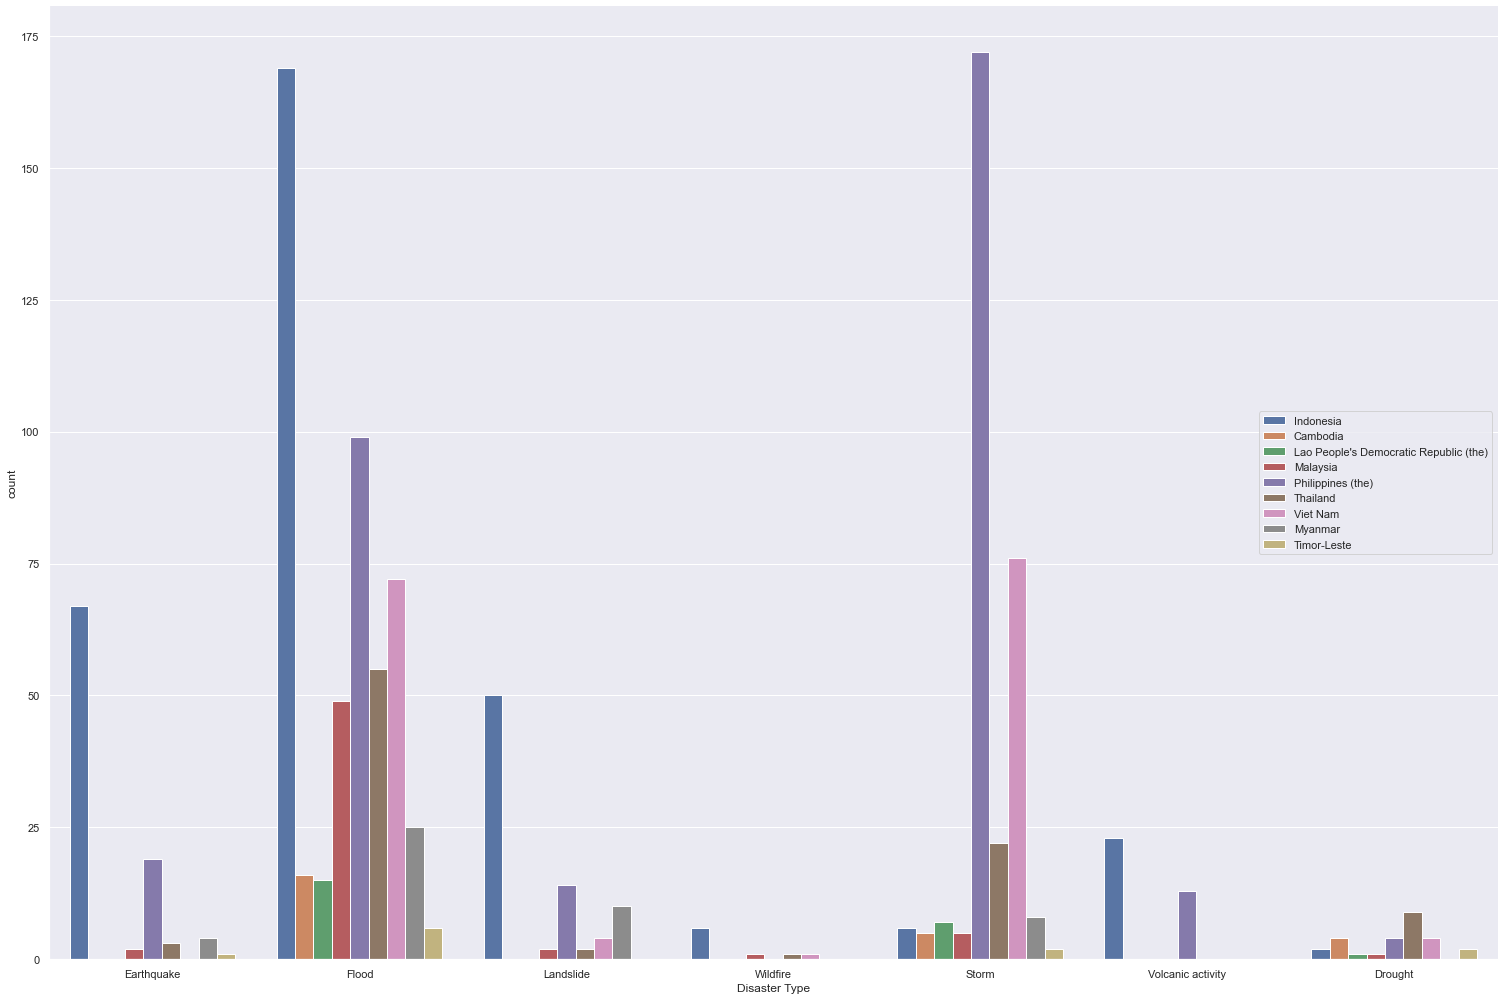

In [168]:
ax = sns.catplot(x="Disaster Type", kind="count", hue="Country", data=sea, height=14, aspect=1.5, legend=False)
plt.legend(loc="center right")

In [169]:
sea_byyear = pd.DataFrame(sea.groupby(["Year", "Disaster Type"], as_index=False)["Dis No"].count())
sea_byyear

,Year,Disaster Type,Dis No
0,2000,Earthquake,5
1,2000,Flood,15
2,2000,Landslide,7
3,2000,Storm,15
4,2000,Volcanic activity,1
5,2000,Wildfire,1
6,2001,Drought,1
7,2001,Earthquake,2
8,2001,Flood,25
9,2001,Landslide,4


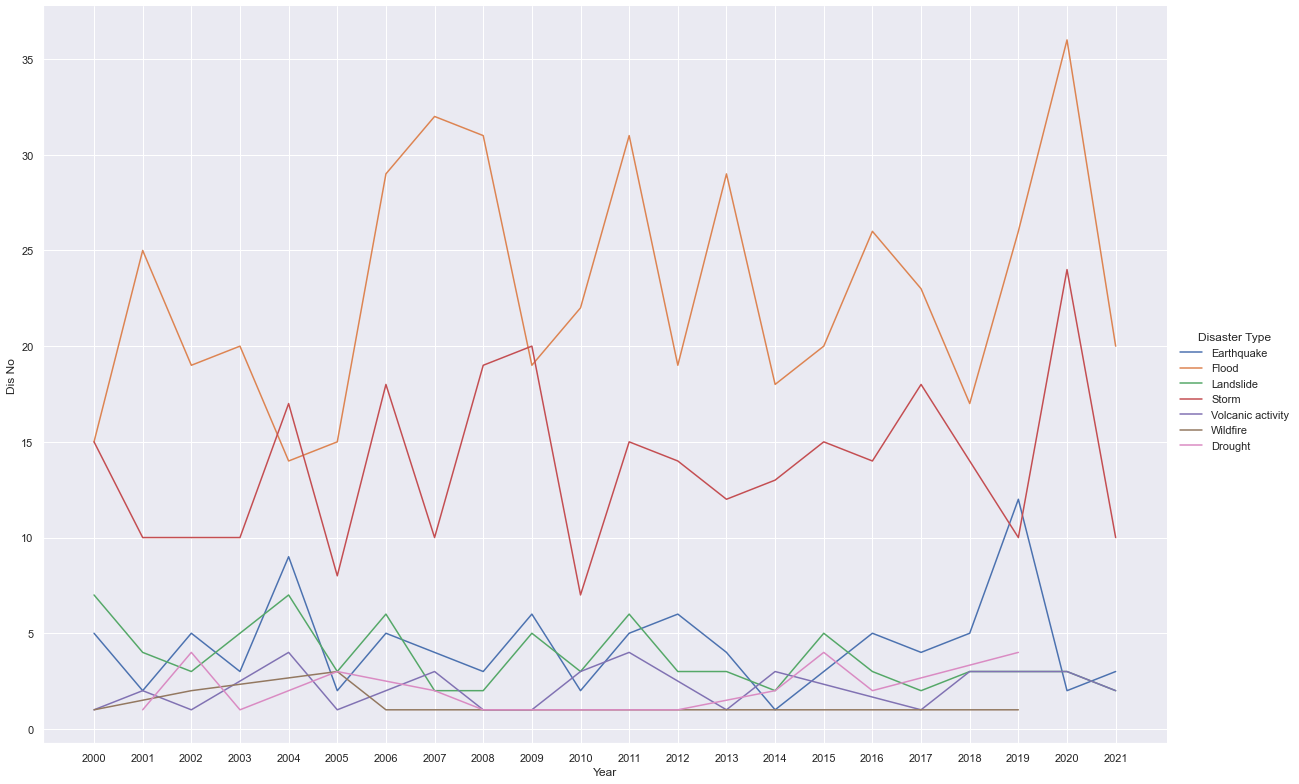

In [170]:
ax = sns.relplot(x="Year", y="Dis No", kind="line", hue="Disaster Type", data=sea_byyear, height=11, aspect=1.5)

In [173]:
sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 47 columns):
Dis No                             1059 non-null object
Year                               1059 non-null object
Seq                                1059 non-null object
Glide                              176 non-null object
Disaster Group                     1059 non-null object
Disaster Subgroup                  1059 non-null object
Disaster Type                      1059 non-null object
Disaster Subtype                   1059 non-null object
Disaster Subsubtype                22 non-null object
Event Name                         306 non-null object
Country                            1059 non-null object
ISO                                1059 non-null object
Region                             1059 non-null object
Continent                          1059 non-null object
Location                           1050 non-null object
Origin                             471 non-null object
As

In [177]:
sea[sea["Dis Mag Value"].isnull()].groupby(["Disaster Type", "Disaster Subtype"])["Dis No"].count()

Disaster Type      Disaster Subtype    
Drought            Drought                  23
Flood              Coastal flood             4
                   Flash flood              76
                   None                    104
                   Riverine flood          113
Landslide          Avalanche                 1
                   Landslide                76
                   Mudslide                  3
                   Rockfall                  1
                   Subsidence                1
Storm              Convective storm         21
                   Extra-tropical storm      1
                   None                     24
                   Tropical cyclone        143
Volcanic activity  Ash fall                 29
                   Lava flow                 3
                   None                      4
Wildfire           Forest fire               7
                   None                      1
Name: Dis No, dtype: int64

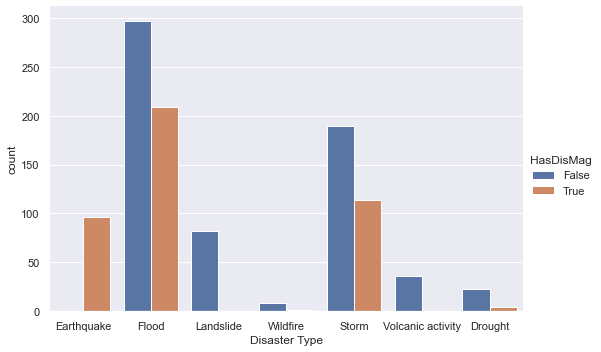

In [175]:
sea["HasDisMag"] = ~sea["Dis Mag Value"].isnull()
ax = sns.catplot(x="Disaster Type", kind="count", hue="HasDisMag", data=sea, height=5, aspect=1.5)

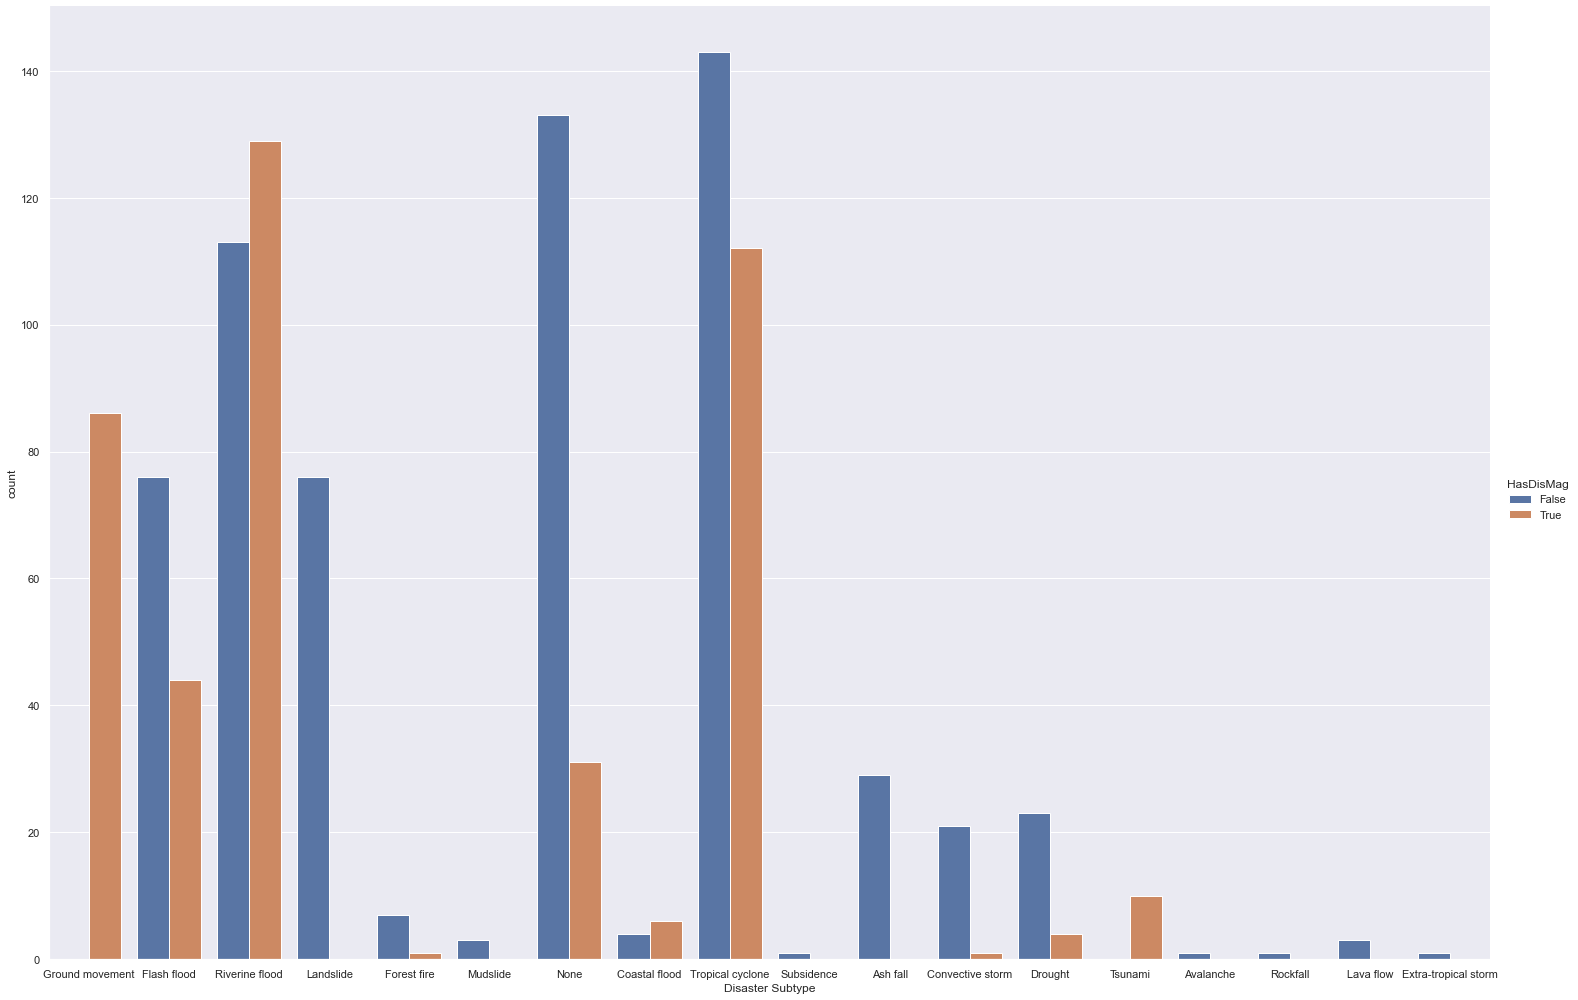

In [176]:
ax = sns.catplot(x="Disaster Subtype", kind="count", hue="HasDisMag", data=sea, height=14, aspect=1.5)

# zooming in: southeast asia's storms and floods

In [215]:
sea_water = sea[sea["Disaster Type"].isin(["Storm", "Flood"])].reset_index(drop=True)
sea_water

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations,HasDisMag
0,2000-0791-IDN,2000,0791,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Indonesia,IDN,South-Eastern Asia,Asia,"Taliwan area (Sumbawa Barat district, Nusateng...",Brief torrential rain,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,NaN,590,Km2,NaN,NaN,NaN,NaN,2000,12,3,2000,12,6,38,NaN,39852,NaN,39852,NaN,NaN,NaN,67.35575898,2,NaN,17984;18197;18200;73714;73800;73857;73858,"Bolaangmongondow, Kota Bitung, Kota Manado, Ku...",True
1,2000-0258-IDN,2000,0258,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Indonesia,IDN,South-Eastern Asia,Asia,"Malaka Tengah, Malaka Barat areas (Belu distri...",Heavy rain,NaN,NaN,Yes,NaN,Yes,100,11400,Km2,NaN,NaN,NaN,Beneneai river,2000,5,16,2000,5,24,126,NaN,50000,NaN,50000,NaN,NaN,79000,67.35575898,2,NaN,18150,Belu (Adm2).,True
2,2000-0770-IDN,2000,0770,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Indonesia,IDN,South-Eastern Asia,Asia,"Aceh Besar, Aceh Utara districts (Nangroe Aceh...",NaN,NaN,NaN,Yes,NaN,NaN,1106,300,Km2,NaN,NaN,NaN,NaN,2000,11,28,2000,12,4,100,21,386000,NaN,386021,NaN,NaN,34000,67.35575898,1;2,1518;73618,17960;18212;18215;73632;73668;73669;73853,"Jambi, Riau (Adm1). Aceh Besar, Aceh Utara, Da...",True
3,2000-0438-KHM,2000,0438,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Cambodia,KHM,South-Eastern Asia,Asia,"Stung Treng, Kratie, Koh Kong, Kampong Cham, P...",Monsoonal rain,NaN,NaN,Yes,NaN,NaN,18970,638,Km2,NaN,NaN,NaN,NaN,2000,7,11,2000,8,10,347,53,3448000,NaN,3448053,NaN,NaN,160000,67.35575898,1,791;792;793;794;795;796;797;798;799;801;804;80...,NaN,"Banteay Meanchey, Battambang, Kampong Cham, Ka...",True
4,2000-0583-LAO,2000,0583,NaN,Natural,Hydrological,Flood,None,NaN,NaN,Lao People's Democratic Republic (the),LAO,South-Eastern Asia,Asia,"Louang-Namtha, Bolikhamxai, Khammouan, Savanna...",NaN,NaN,NaN,Yes,NaN,NaN,973,1104,Km2,NaN,NaN,NaN,NaN,2000,9,NaN,2000,9,NaN,15,NaN,450000,NaN,450000,NaN,NaN,1000,67.35575898,1,1755;1756;1758;1760;1763;1764;1768;74346,NaN,"Bolikhamxai, Champasak, Khammouan, Louang-Namt...",True
5,2000-0774-MYS,2000,0774,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Malaysia,MYS,South-Eastern Asia,Asia,"Kuala Krai, Pasir Puteh, Kota Bharu, Pasir Mas...",Brief torrential rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,"Sungai Bata, Sungai Kampung Telok Malik, Sunga...",2000,11,21,2000,12,1,12,NaN,8000,NaN,8000,NaN,NaN,1000,67.35575898,2,NaN,37347;37349;37352;37359;37360;37362;37363;3736...,"Besut, Kota Bharu, Kota Setar, Kuala Krai, Kub...",False
6,2000-0683-MYS,2000,0683,NaN,Natural,Meteorological,Storm,None,NaN,NaN,Malaysia,MYS,South-Eastern Asia,Asia,Pulau Pinang province,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,2000,9,27,2000,9,27,NaN,NaN,500,NaN,500,NaN,NaN,NaN,67.35575898,1,1900,NaN,Pulau Pinang (Adm1).,False
7,2001-0051-IDN,2001,0051,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Indonesia,IDN,South-Eastern Asia,Asia,"Bogor district (Jawa Barat province), Bojonego...",Brief torrential rain,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,"Cilemer and Ciujung rivers, Manyang river, Ben...",2001,2,4,2001,2,18,130,NaN,80000,NaN,80000,NaN,NaN,10000,69.25933995,1;2,1516,18008;18020;18022;18028;18067;18070;18199;73728,"Dki Jakarta (Adm1). Bogor, Bojonegoro, Jember,...",False
8,2000-0038-PHL,2000,0038,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Philippines (the),PHL,South-Eastern Asia,Asia,"Agusan del Sur, Agusan

In [223]:
sea_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 48 columns):
Dis No                             809 non-null object
Year                               809 non-null object
Seq                                809 non-null object
Glide                              137 non-null object
Disaster Group                     809 non-null object
Disaster Subgroup                  809 non-null object
Disaster Type                      809 non-null object
Disaster Subtype                   809 non-null object
Disaster Subsubtype                21 non-null object
Event Name                         269 non-null object
Country                            809 non-null object
ISO                                809 non-null object
Region                             809 non-null object
Continent                          809 non-null object
Location                           802 non-null object
Origin                             403 non-null object
Associated Dis  

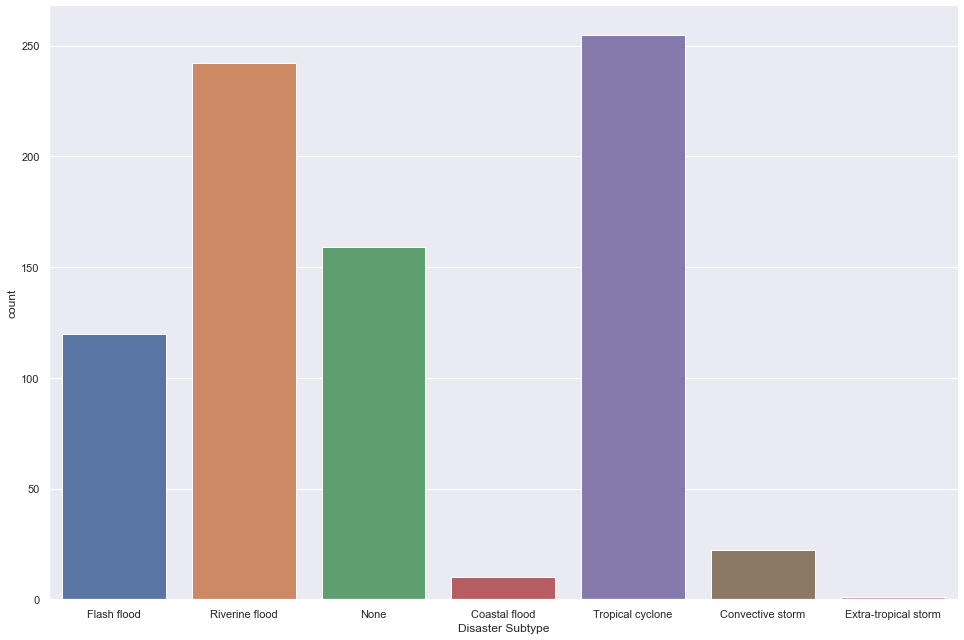

In [199]:
ax = sns.catplot(x="Disaster Subtype", kind="count", data=sea_water, height=9, aspect=1.5)

In [219]:
# replace Disaster Subtype == None with Disaster Type so that they can at least be visible on a chart
sea_water["Disaster Subtype"] = np.where(sea_water["Disaster Subtype"] == "None", sea_water["Disaster Type"], sea_water["Disaster Subtype"])

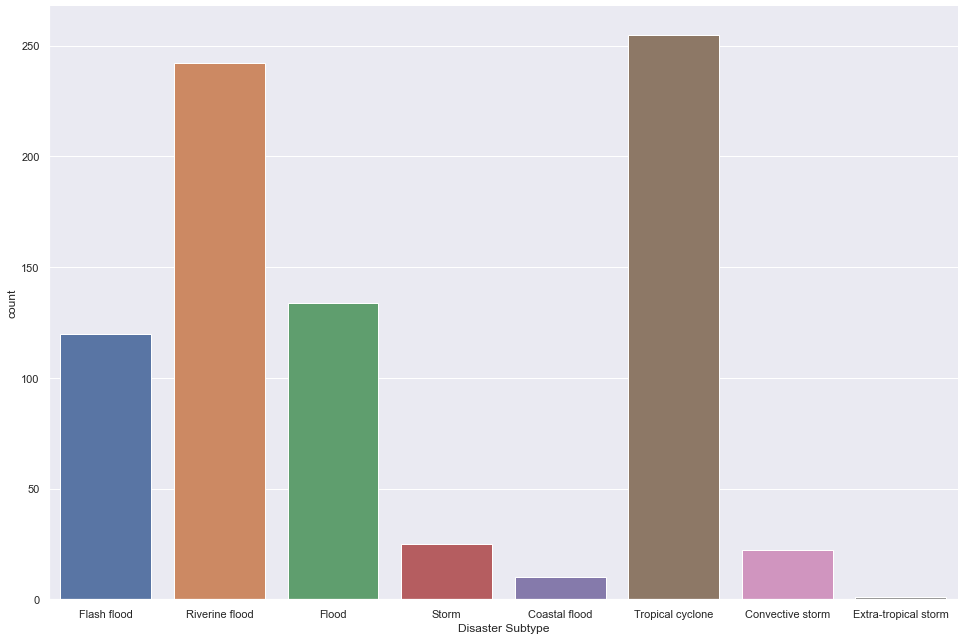

In [220]:
ax = sns.catplot(x="Disaster Subtype", kind="count", data=sea_water, height=9, aspect=1.5)

In [289]:
plt.rc("legend", fontsize=18, loc="upper right")
plt.rc("axes", labelsize=24)
plt.rc("xtick", labelsize=18)
plt.rc("ytick", labelsize=18)
plt.rc("figure", titlesize=27)
plt.rc("savefig", bbox="tight")

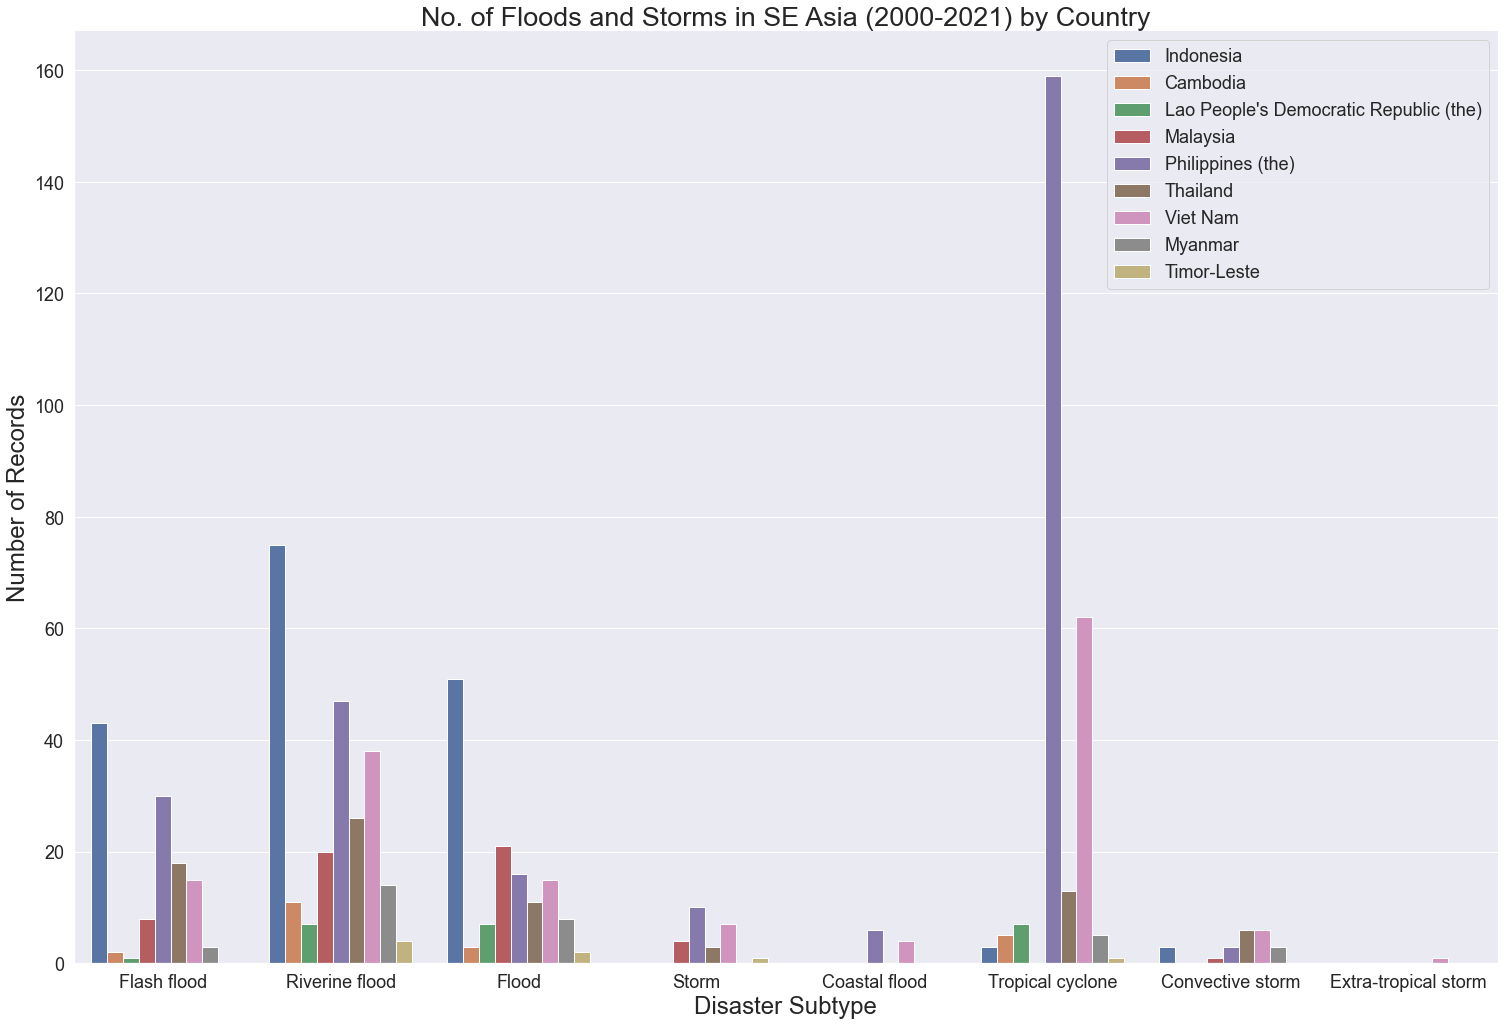

In [297]:
ax = sns.catplot(x="Disaster Subtype", kind="count", hue="Country", data=sea_water, height=14, aspect=1.5, legend=False)
ax.set_axis_labels("Disaster Subtype", "Number of Records")
plt.legend()
plt.title("No. of Floods and Storms in SE Asia (2000-2021) by Country")
plt.savefig("../images/No of Floods and Storms in SE Asia (2000-2021) by Country")

In [291]:
sea_water1 = sea_water[sea_water["Total Affected"].notna()].reset_index(drop=True)
sea_water1["Total Affected"] = sea_water1["Total Affected"].astype(float)

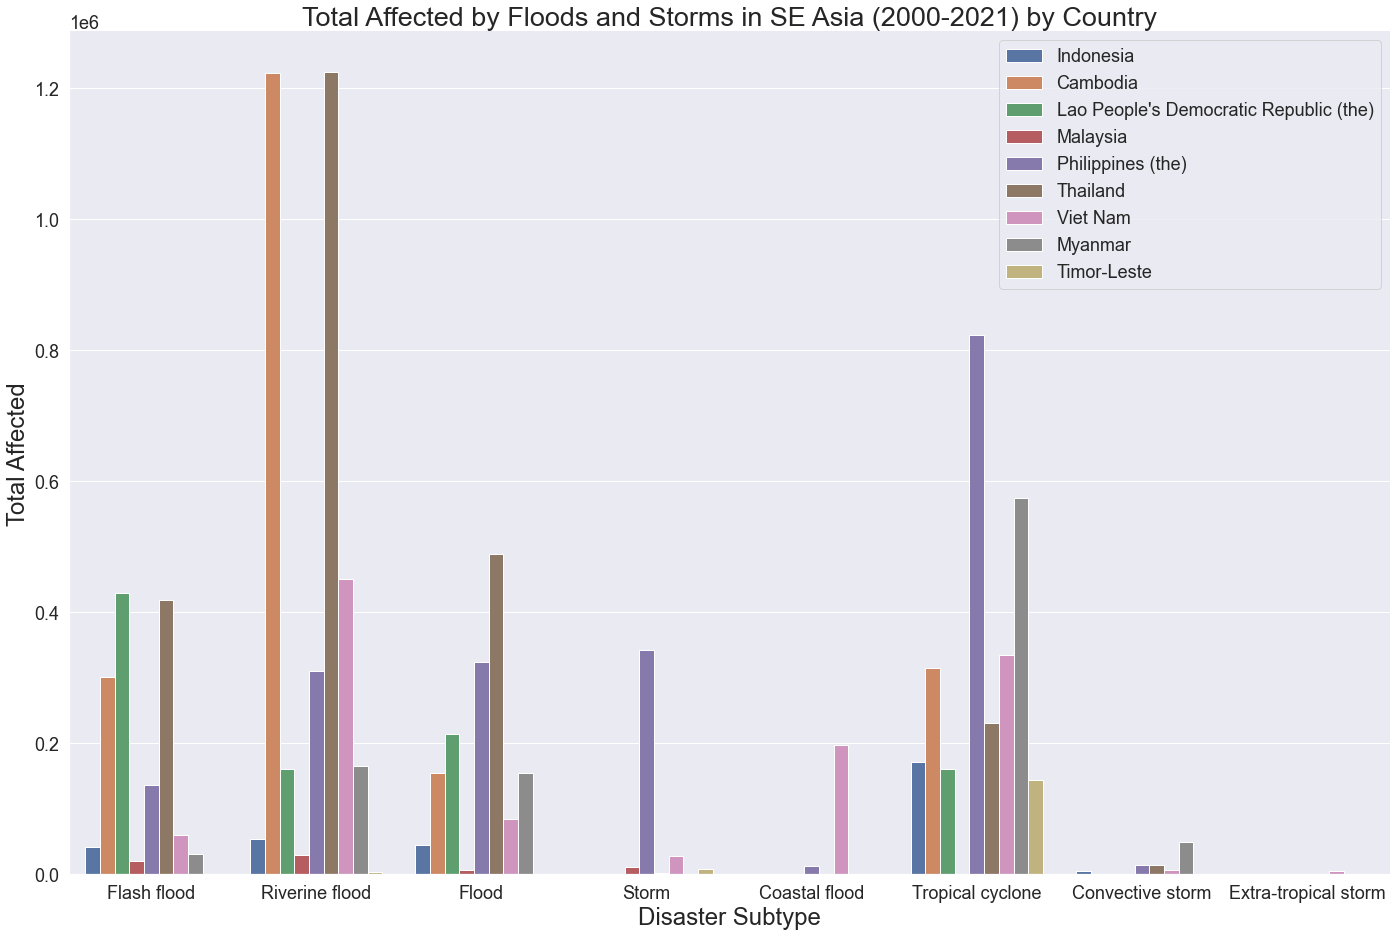

In [296]:
ax = sns.catplot(x="Disaster Subtype", y="Total Affected", hue="Country", kind="bar", data=sea_water1, ci=None, height=13, aspect=1.5, legend=None)
plt.legend()
plt.title("Total Affected by Floods and Storms in SE Asia (2000-2021) by Country")
plt.savefig("../images/Total Affected of Floods and Storms in SE Asia (2000-2021) by Country")

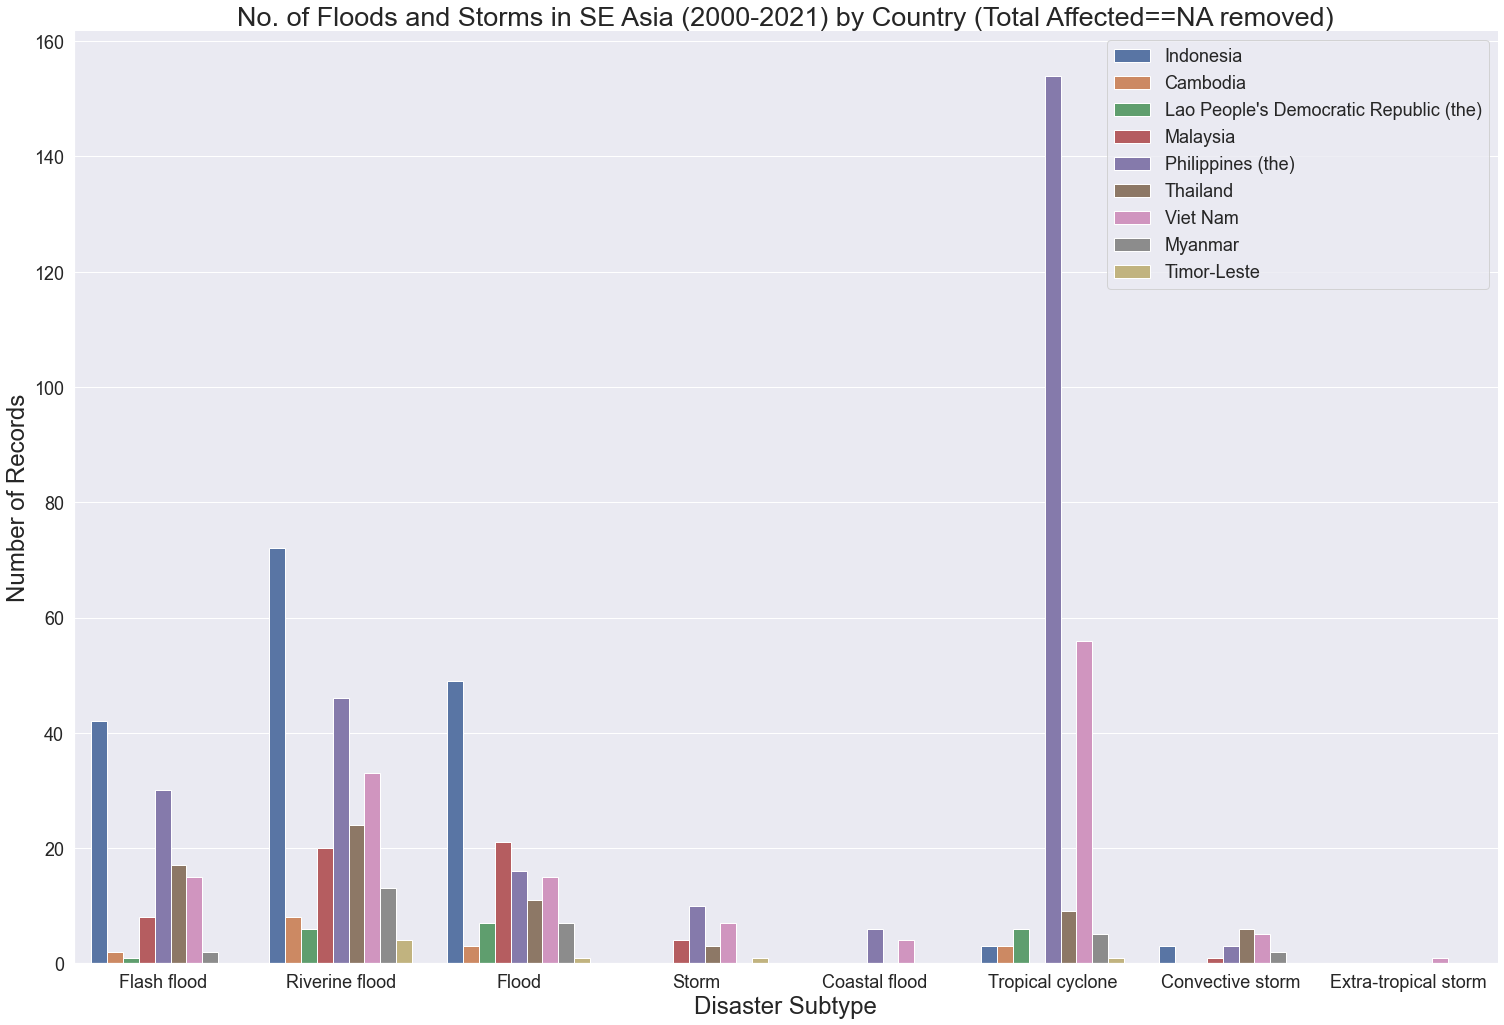

In [300]:
ax = sns.catplot(x="Disaster Subtype", kind="count", hue="Country", data=sea_water1, height=14, aspect=1.5, legend=False)
ax.set_axis_labels("Disaster Subtype", "Number of Records")
plt.legend()
plt.title("No. of Floods and Storms in SE Asia (2000-2021) by Country (Total Affected==NA removed)")
plt.savefig("../images/No of Floods and Storms in SE Asia (2000-2021) by Country (Total Affected==NA removed)")

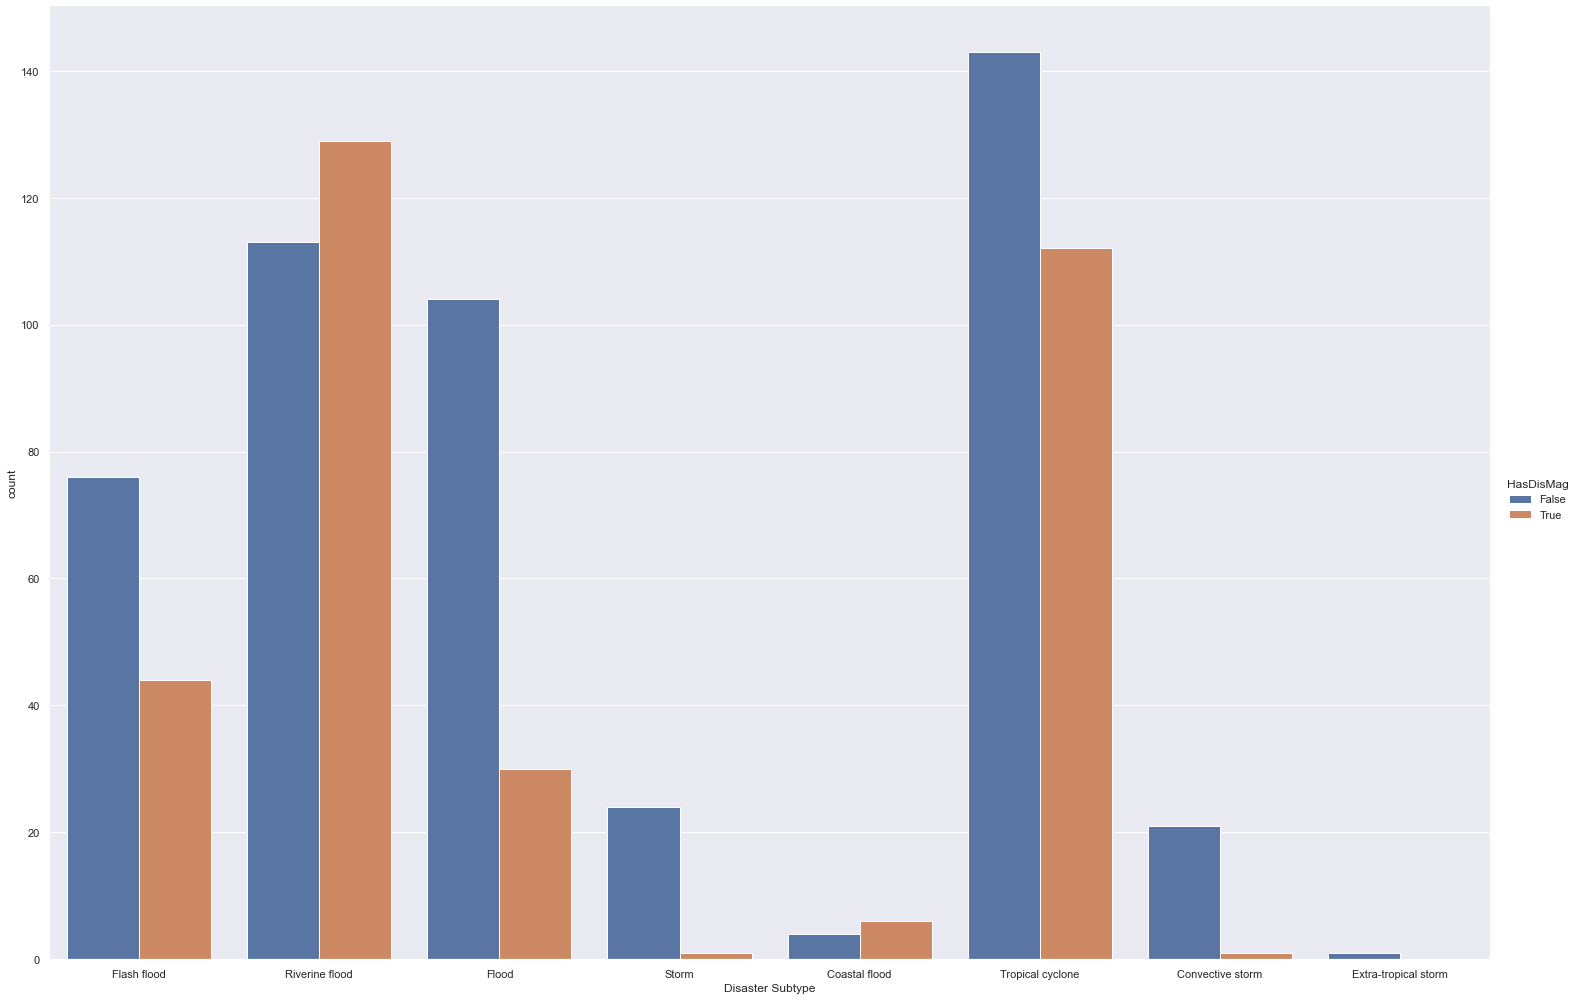

In [222]:
sea_water["HasDisMag"] = ~sea_water["Dis Mag Value"].isnull()
ax = sns.catplot(x="Disaster Subtype", kind="count", hue="HasDisMag", data=sea_water, height=14, aspect=1.5)